<H1> THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS </H1>

<H2> Task 6: Prediction using Decision Tree Algorithm </H2>

**AIM:** Create a Decision Tree classifier and visualize it graphically. The purpose is that if we feed any new data to this classifier, it would be able to predict the right class accordingly. <br>
**LANGUAGE USED:** Python 3 <br>
**IDE:** Jupyter Notebook <br>
**TYPE:** Decision Tree Classification <br>
**AUTHOR:** Gouri Rajesh <br>

**STEPS TO BE FOLLOWED:**
* Step 1: Import and Prepare the Data
* Step 2: Visualize and Analyze the Dataset
* Step 3: Prepare the data
* Step 4: Design and Train the Decision Tree Model
* Step 5: Visualize the Decision Tree Model
* Step 6: Make Predictions
* Step 7: Evaluate the Model

<h3> Step 1: Import and Prepare the Data </h3>

In [1]:
# Importing the required libraries in Python

import pandas as pd
import numpy as np
import sklearn.datasets as datasets

In [2]:
# Loading the iris dataset
iris_data = datasets.load_iris()

# Forming the iris dataframe
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_data.target
#Here 0= Iris Setosa; 1= Iris Versicolor; 2= Iris Virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<h3> Step 2: Visualize and Analyze the Dataset </h3>

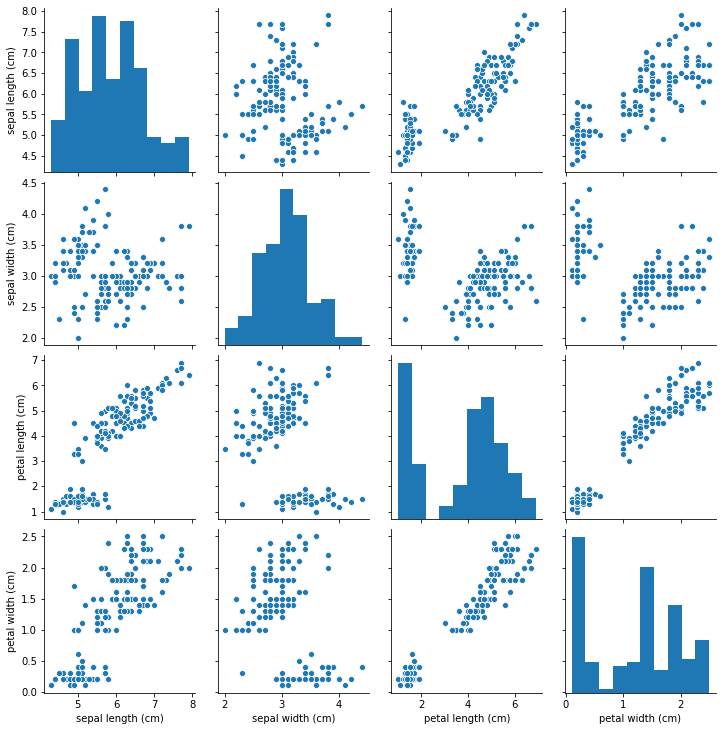

In [8]:
import seaborn as sns

sns.pairplot(data=iris_df,kind='scatter')


In [9]:
# Reading data from local computer location

iris = pd.read_csv("C:/Users/admin/Jupyter Notebooks/THE SPARKS FOUNDATION/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris.drop('Id', inplace=True, axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


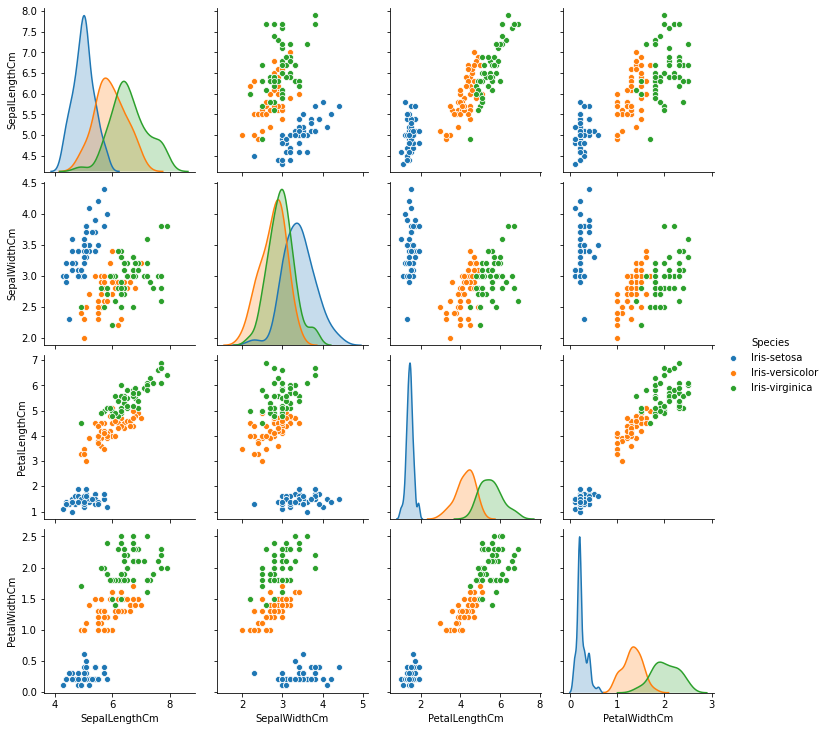

In [11]:
sns.pairplot(iris,hue='Species');

<h3> Step 3: Prepare the data </h3>

In [12]:
X = iris.iloc[:,:-1].values    #Contains all the values of the attributes of the flower
y = iris['Species']            #Contains the target species of the flowers

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

<h3> Step 4: Design and Train the Decision Tree Model </h3>

In [18]:
# Defining the decision tree algorithm

from sklearn import tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


<h3> Step 5: Visualize the Decision Tree Model </h3>

[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(100.44000000000001, 90.6, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.840000000000

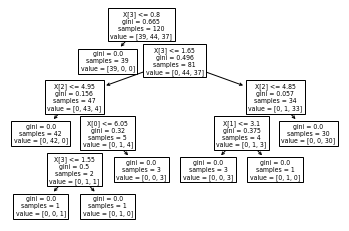

In [19]:
tree.plot_tree(dtree)

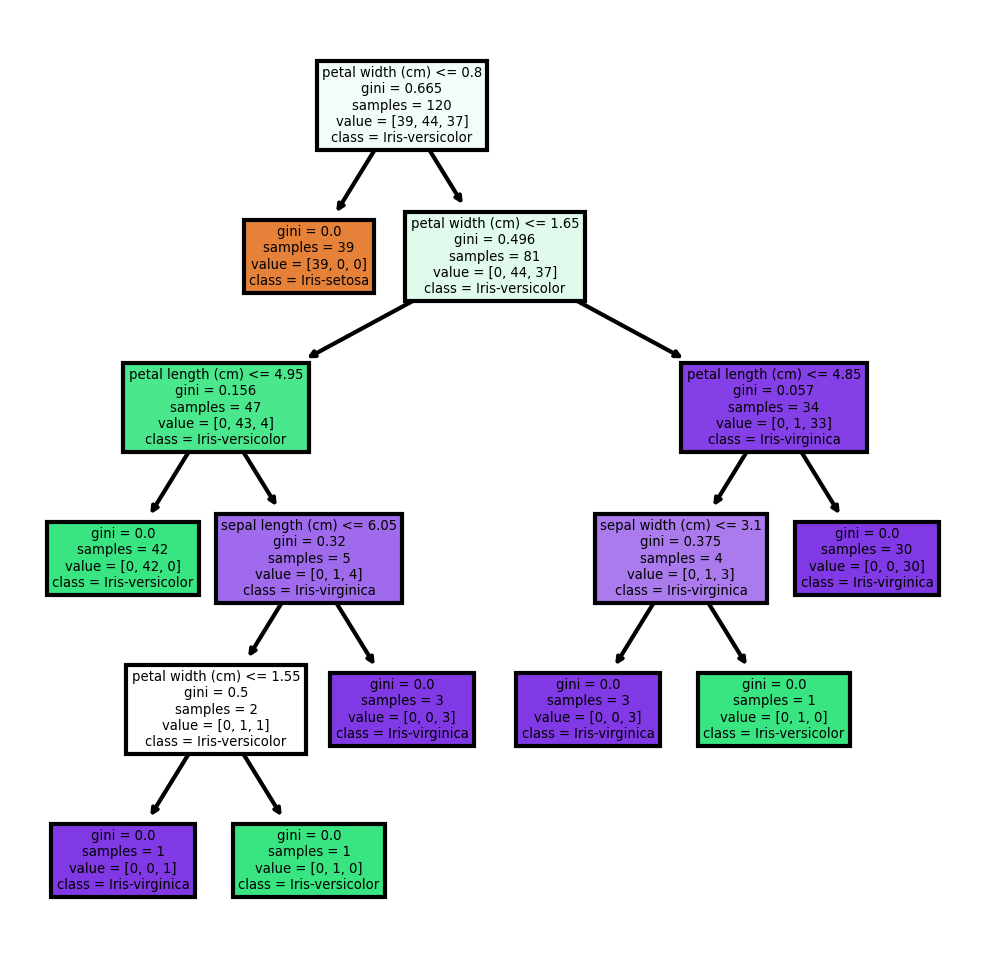

In [20]:
import matplotlib.pyplot as plt

f_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
c_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree, feature_names = f_names, class_names=c_names, filled = True);
fig.savefig('Iris_Tree.png')

<h3> Step 6: Make Predictions </h3>

In [21]:
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y = le.fit_transform(y_pred)
y

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

<h3> Step 7: Evaluate the Model </h3>

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

In [24]:
from sklearn.metrics import f1_score

f1=f1_score(y_test,y_pred,average='weighted')
f1

0.9657687991021324

In [25]:
# Comparing Actual vs Predicted

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
result_df

,Actual,Predicted
128,Iris-virginica,Iris-virginica
11,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
15,Iris-setosa,Iris-setosa
123,Iris-virginica,Iris-virginica
135,Iris-virginica,Iris-virginica
32,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
116,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa


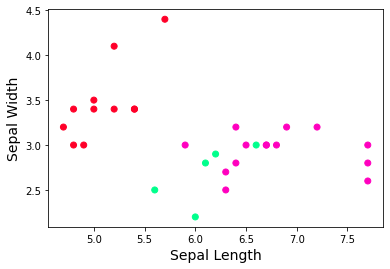

In [26]:
plt.scatter(X_test[:,0],X_test[:,1], c = y, cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.show() 

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



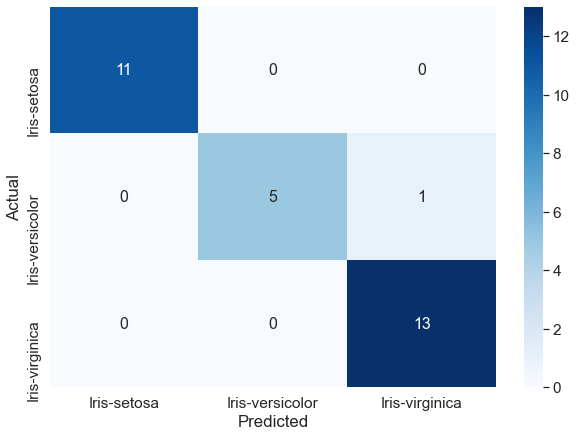

In [28]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})



Precision, recall and f1-score are above 90% that means the model fitted and predicted very well. Accuracy is also around 95% both for weighted average and macro average.